In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import ast

In [2]:
df_pdd = pd.read_csv('../results/pdd_features.csv')
df_eval=pd.read_csv("../results/eval_features.csv")

def safe_eval(val):
    if isinstance(val, str):
        return ast.literal_eval(val)
    return val

# Apply to all list-like feature columns
columns_to_parse = [col for col in df_pdd.columns if col not in ['filename', 'fake']]
for col in columns_to_parse:
    df_pdd[col] = df_pdd[col].apply(safe_eval)
    

for col in columns_to_parse:
    df_eval[col] = df_eval[col].apply(safe_eval)

In [3]:
def average_segments(seq, num_segments=5):
    k = len(seq) // num_segments
    return [np.mean(seq[i:i+k]) for i in range(0, len(seq), k)][:num_segments]

# Presidential Deepfake Dataset

## Head Movement

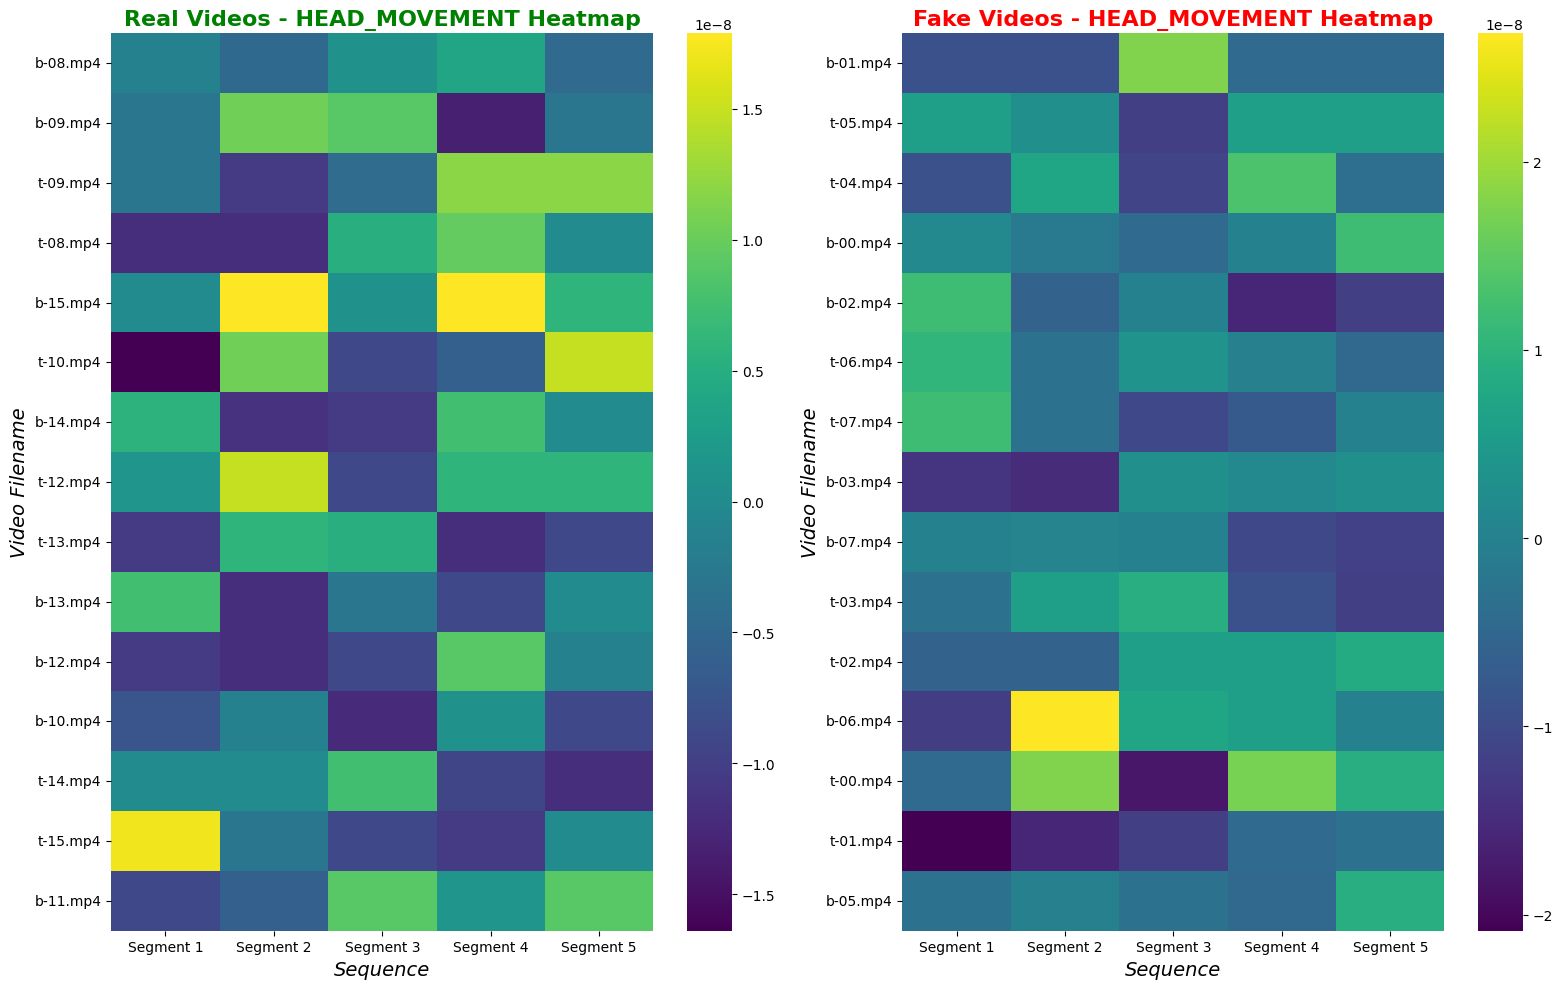

In [26]:
feature = 'head_movement'
feature_display_name = feature.upper()

# Check number of frames
num_frames = len(df_pdd[feature][0])

if num_frames > 5:
    df_pdd[f'{feature}_segmented'] = df_pdd[feature].apply(lambda x: average_segments(x, 5))
    frame_labels = [f"Segment {i+1}" for i in range(5)]
else:
    df_pdd[f'{feature}_segmented'] = df_pdd[feature]
    frame_labels = [f"{i+1}" for i in range(num_frames)]

# Split and stack
real_df_pdd = df_pdd[df_pdd['fake'] == 0].copy()
fake_df_pdd = df_pdd[df_pdd['fake'] == 1].copy()

real_data = np.stack(real_df_pdd[f'{feature}_segmented'].to_numpy())
fake_data = np.stack(fake_df_pdd[f'{feature}_segmented'].to_numpy())

# Plot
fig, axs = plt.subplots(1, 2, figsize=(16, 10))

sns.heatmap(real_data, ax=axs[0], cmap="viridis", cbar=True,
            xticklabels=frame_labels, yticklabels=real_df_pdd['filename'].tolist())
axs[0].set_title(f"Real Videos - {feature_display_name} Heatmap", fontsize=16, fontweight='bold', color="green")
axs[0].set_xlabel("Sequence", fontsize=14, fontstyle='italic')
axs[0].set_ylabel("Video Filename", fontsize=14, fontstyle='italic')

sns.heatmap(fake_data, ax=axs[1], cmap="viridis", cbar=True,
            xticklabels=frame_labels, yticklabels=fake_df_pdd['filename'].tolist())
axs[1].set_title(f"Fake Videos - {feature_display_name} Heatmap", fontsize=16, fontweight='bold', color="red")
axs[1].set_xlabel("Sequence", fontsize=14, fontstyle='italic')
axs[1].set_ylabel("Video Filename", fontsize=14, fontstyle='italic')

plt.tight_layout()
plt.show()

## Flicker

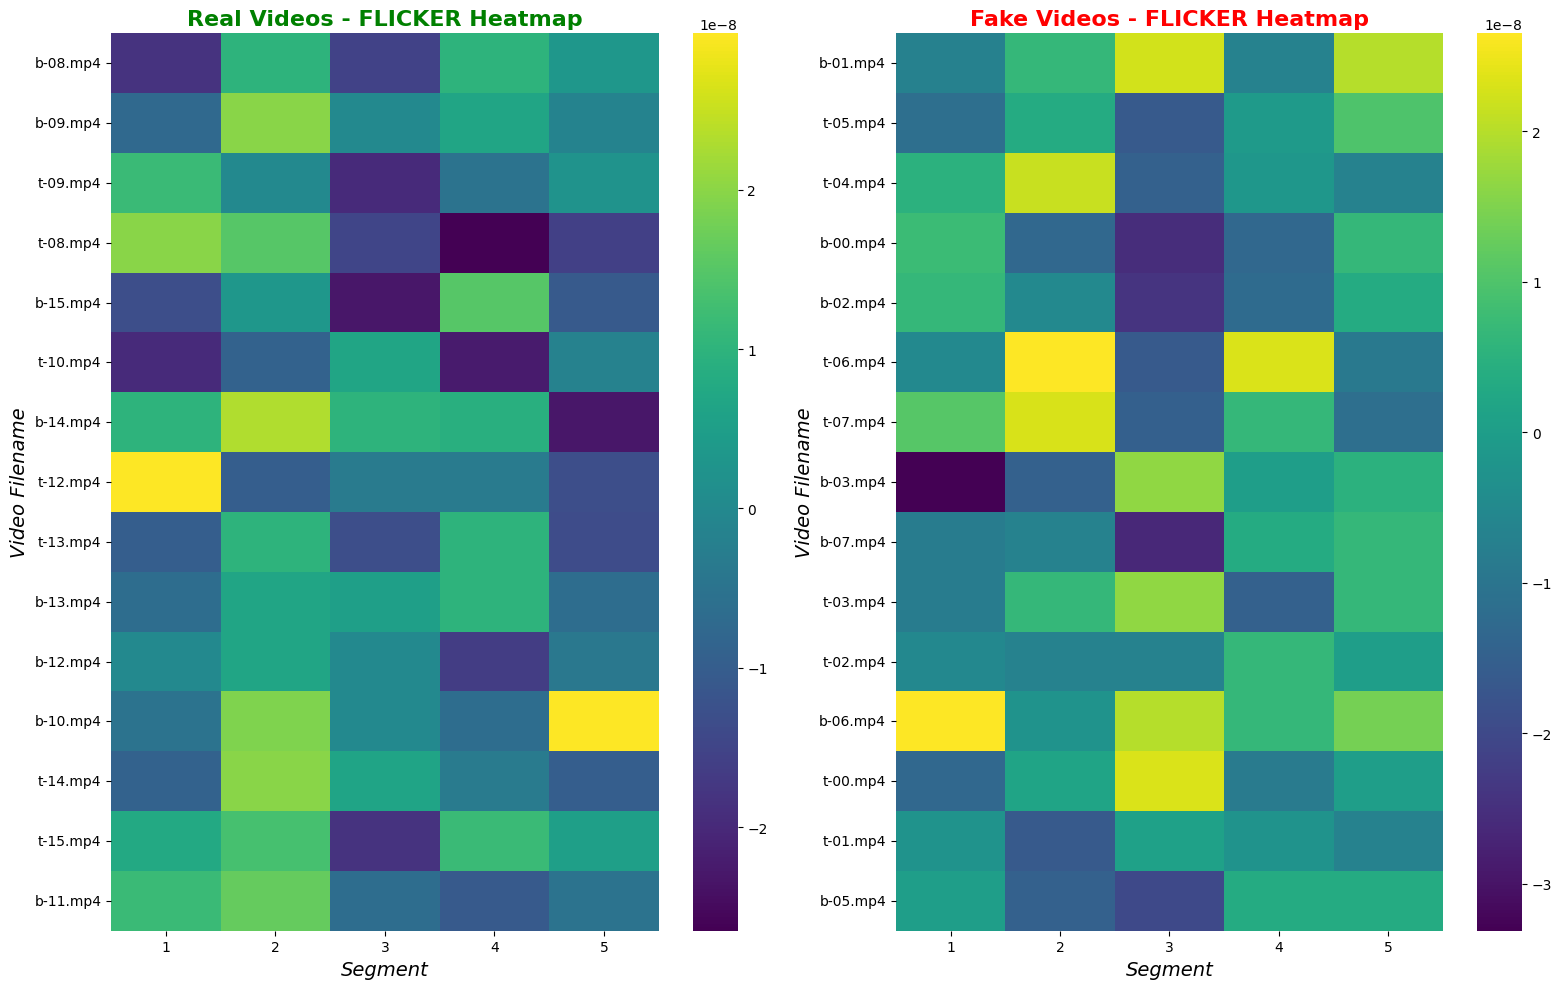

In [25]:
feature = 'flicker'
feature_display_name = feature.upper()

# Check number of frames
num_frames = len(df_pdd[feature][0])

if num_frames > 5:
    df_pdd[f'{feature}_segmented'] = df_pdd[feature].apply(lambda x: average_segments(x, 5))
    frame_labels = [f"{i+1}" for i in range(5)]
else:
    df_pdd[f'{feature}_segmented'] = df_pdd[feature]
    frame_labels = [f"{i+1}" for i in range(num_frames)]

# Split and stack
real_df_pdd = df_pdd[df_pdd['fake'] == 0].copy()
fake_df_pdd = df_pdd[df_pdd['fake'] == 1].copy()

real_data = np.stack(real_df_pdd[f'{feature}_segmented'].to_numpy())
fake_data = np.stack(fake_df_pdd[f'{feature}_segmented'].to_numpy())

# Plot
fig, axs = plt.subplots(1, 2, figsize=(16, 10))

sns.heatmap(real_data, ax=axs[0], cmap="viridis", cbar=True,
            xticklabels=frame_labels, yticklabels=real_df_pdd['filename'].tolist())
axs[0].set_title(f"Real Videos - {feature_display_name} Heatmap", fontsize=16, fontweight='bold', color="green")
axs[0].set_xlabel("Segment", fontsize=14, fontstyle='italic')
axs[0].set_ylabel("Video Filename", fontsize=14, fontstyle='italic')

sns.heatmap(fake_data, ax=axs[1], cmap="viridis", cbar=True,
            xticklabels=frame_labels, yticklabels=fake_df_pdd['filename'].tolist())
axs[1].set_title(f"Fake Videos - {feature_display_name} Heatmap", fontsize=16, fontweight='bold', color="red")
axs[1].set_xlabel("Segment", fontsize=14, fontstyle='italic')
axs[1].set_ylabel("Video Filename", fontsize=14, fontstyle='italic')

plt.tight_layout()

## Blink

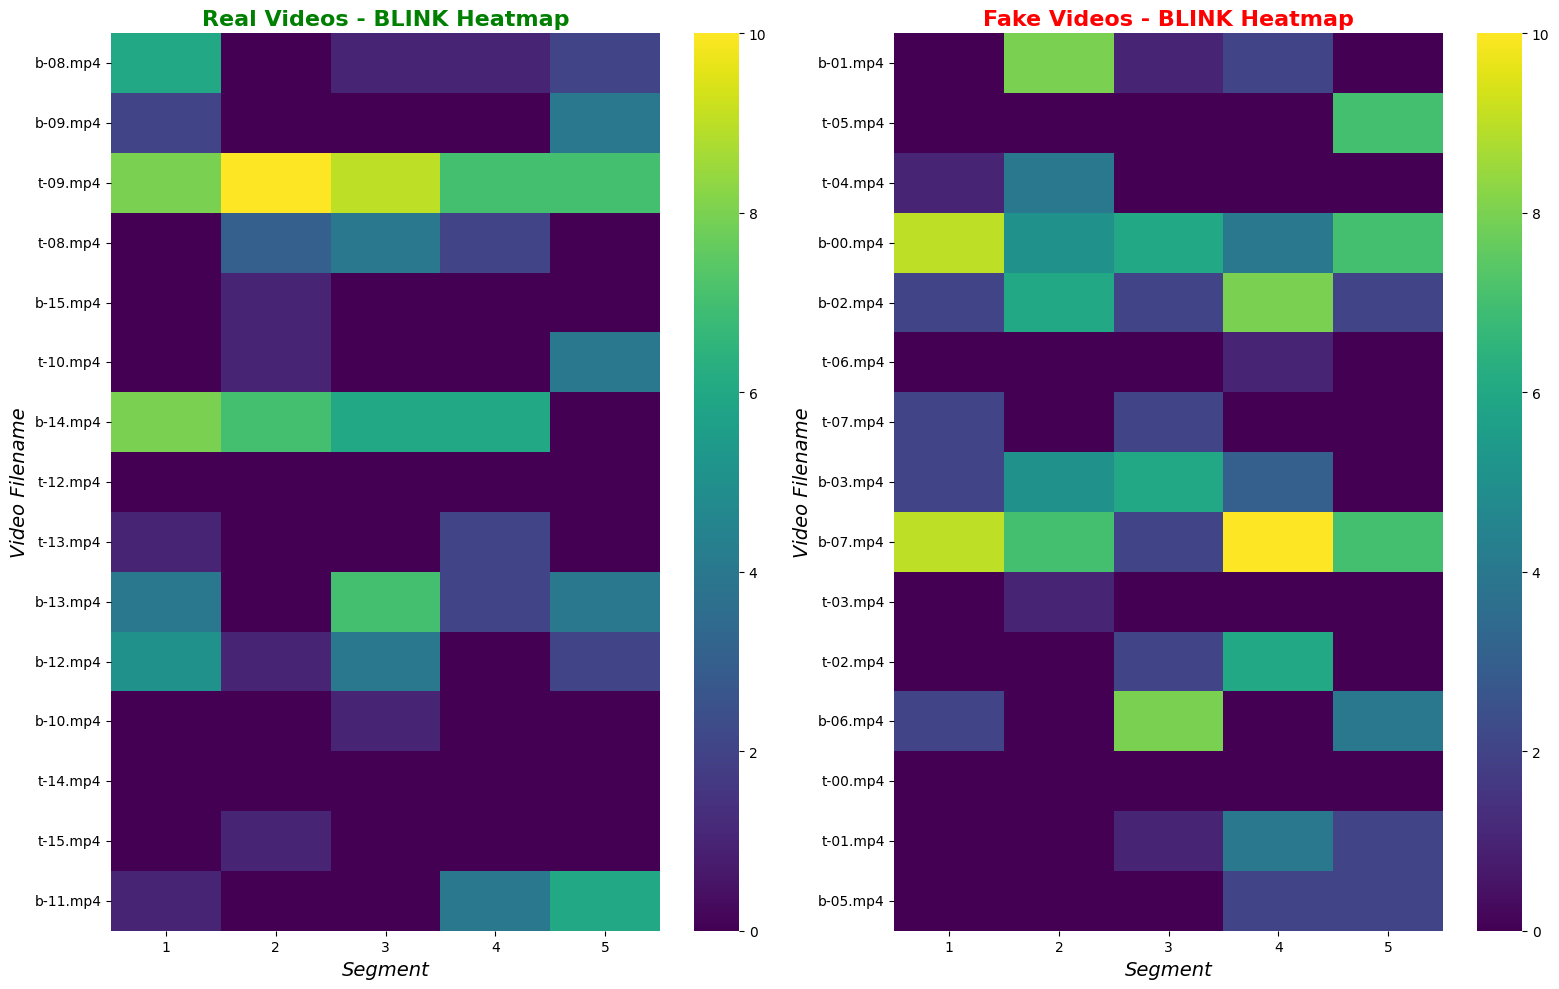

In [24]:
feature = 'blink'
feature_display_name = feature.upper()

# Check number of frames
num_frames = len(df_pdd[feature][0])

if num_frames > 5:
    df_pdd[f'{feature}_segmented'] = df_pdd[feature].apply(lambda x: average_segments(x, 5))
    frame_labels = [f"{i+1}" for i in range(5)]
else:
    df_pdd[f'{feature}_segmented'] = df_pdd[feature]
    frame_labels = [f"{i+1}" for i in range(num_frames)]

# Split and stack
real_df_pdd = df_pdd[df_pdd['fake'] == 0].copy()
fake_df_pdd = df_pdd[df_pdd['fake'] == 1].copy()

real_data = np.stack(real_df_pdd[f'{feature}_segmented'].to_numpy())
fake_data = np.stack(fake_df_pdd[f'{feature}_segmented'].to_numpy())

# Plot
fig, axs = plt.subplots(1, 2, figsize=(16, 10))

sns.heatmap(real_data, ax=axs[0], cmap="viridis", cbar=True,
            xticklabels=frame_labels, yticklabels=real_df_pdd['filename'].tolist())
axs[0].set_title(f"Real Videos - {feature_display_name} Heatmap", fontsize=16, fontweight='bold', color="green")
axs[0].set_xlabel("Segment", fontsize=14, fontstyle='italic')
axs[0].set_ylabel("Video Filename", fontsize=14, fontstyle='italic')

sns.heatmap(fake_data, ax=axs[1], cmap="viridis", cbar=True,
            xticklabels=frame_labels, yticklabels=fake_df_pdd['filename'].tolist())
axs[1].set_title(f"Fake Videos - {feature_display_name} Heatmap", fontsize=16, fontweight='bold', color="red")
axs[1].set_xlabel("Segment", fontsize=14, fontstyle='italic')
axs[1].set_ylabel("Video Filename", fontsize=14, fontstyle='italic')

plt.tight_layout()

## Lip movement variance

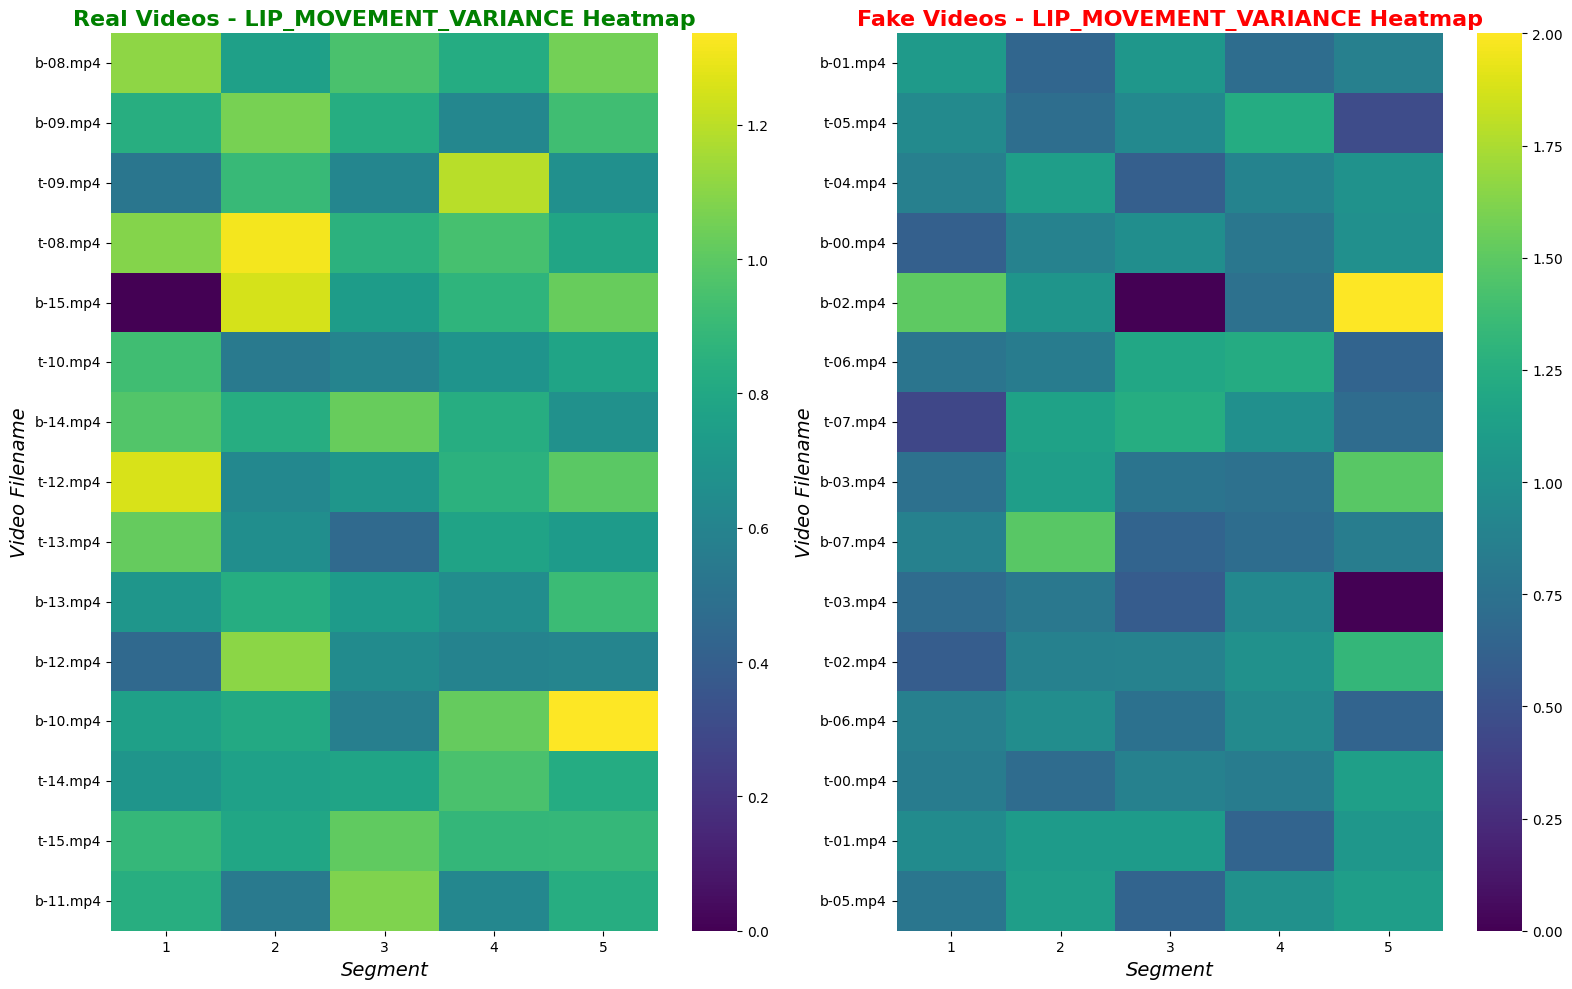

In [23]:
feature = 'lip_movement_variance'
feature_display_name = feature.upper()

# Check number of frames
num_frames = len(df_pdd[feature][0])

if num_frames > 5:
    df_pdd[f'{feature}_segmented'] = df_pdd[feature].apply(lambda x: average_segments(x, 5))
    frame_labels = [f"{i+1}" for i in range(5)]
else:
    df_pdd[f'{feature}_segmented'] = df_pdd[feature]
    frame_labels = [f"{i+1}" for i in range(num_frames)]

# Split and stack
real_df_pdd = df_pdd[df_pdd['fake'] == 0].copy()
fake_df_pdd = df_pdd[df_pdd['fake'] == 1].copy()

real_data = np.stack(real_df_pdd[f'{feature}_segmented'].to_numpy())
fake_data = np.stack(fake_df_pdd[f'{feature}_segmented'].to_numpy())

# Plot
fig, axs = plt.subplots(1, 2, figsize=(16, 10))

sns.heatmap(real_data, ax=axs[0], cmap="viridis", cbar=True,
            xticklabels=frame_labels, yticklabels=real_df_pdd['filename'].tolist())
axs[0].set_title(f"Real Videos - {feature_display_name} Heatmap", fontsize=16, fontweight='bold', color="green")
axs[0].set_xlabel("Segment", fontsize=14, fontstyle='italic')
axs[0].set_ylabel("Video Filename", fontsize=14, fontstyle='italic')

sns.heatmap(fake_data, ax=axs[1], cmap="viridis", cbar=True,
            xticklabels=frame_labels, yticklabels=fake_df_pdd['filename'].tolist())
axs[1].set_title(f"Fake Videos - {feature_display_name} Heatmap", fontsize=16, fontweight='bold', color="red")
axs[1].set_xlabel("Segment", fontsize=14, fontstyle='italic')
axs[1].set_ylabel("Video Filename", fontsize=14, fontstyle='italic')

plt.tight_layout()

## SSIM

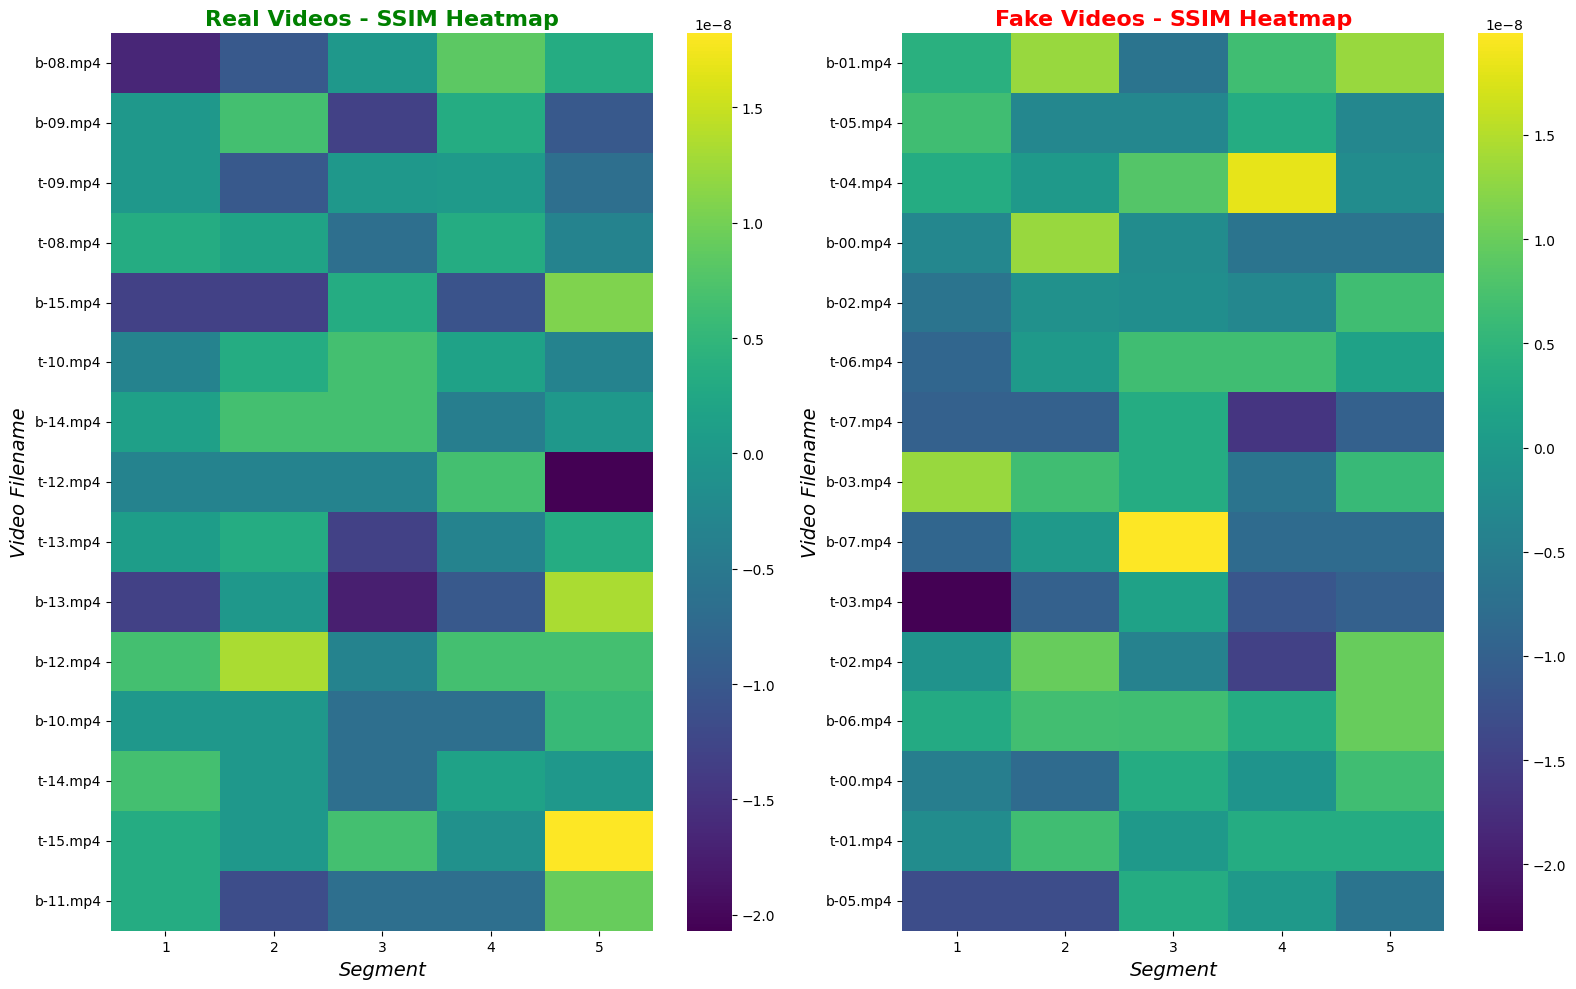

In [22]:
feature = 'ssim'
feature_display_name = feature.upper()

# Check number of frames
num_frames = len(df_pdd[feature][0])

if num_frames > 5:
    df_pdd[f'{feature}_segmented'] = df_pdd[feature].apply(lambda x: average_segments(x, 5))
    frame_labels = [f"{i+1}" for i in range(5)]
else:
    df_pdd[f'{feature}_segmented'] = df_pdd[feature]
    frame_labels = [f"{i+1}" for i in range(num_frames)]

# Split and stack
real_df_pdd = df_pdd[df_pdd['fake'] == 0].copy()
fake_df_pdd = df_pdd[df_pdd['fake'] == 1].copy()

real_data = np.stack(real_df_pdd[f'{feature}_segmented'].to_numpy())
fake_data = np.stack(fake_df_pdd[f'{feature}_segmented'].to_numpy())

# Plot
fig, axs = plt.subplots(1, 2, figsize=(16, 10))

sns.heatmap(real_data, ax=axs[0], cmap="viridis", cbar=True,
            xticklabels=frame_labels, yticklabels=real_df_pdd['filename'].tolist())
axs[0].set_title(f"Real Videos - {feature_display_name} Heatmap", fontsize=16, fontweight='bold', color="green")
axs[0].set_xlabel("Segment", fontsize=14, fontstyle='italic')
axs[0].set_ylabel("Video Filename", fontsize=14, fontstyle='italic')

sns.heatmap(fake_data, ax=axs[1], cmap="viridis", cbar=True,
            xticklabels=frame_labels, yticklabels=fake_df_pdd['filename'].tolist())
axs[1].set_title(f"Fake Videos - {feature_display_name} Heatmap", fontsize=16, fontweight='bold', color="red")
axs[1].set_xlabel("Segment", fontsize=14, fontstyle='italic')
axs[1].set_ylabel("Video Filename", fontsize=14, fontstyle='italic')

plt.tight_layout()

## PSNR

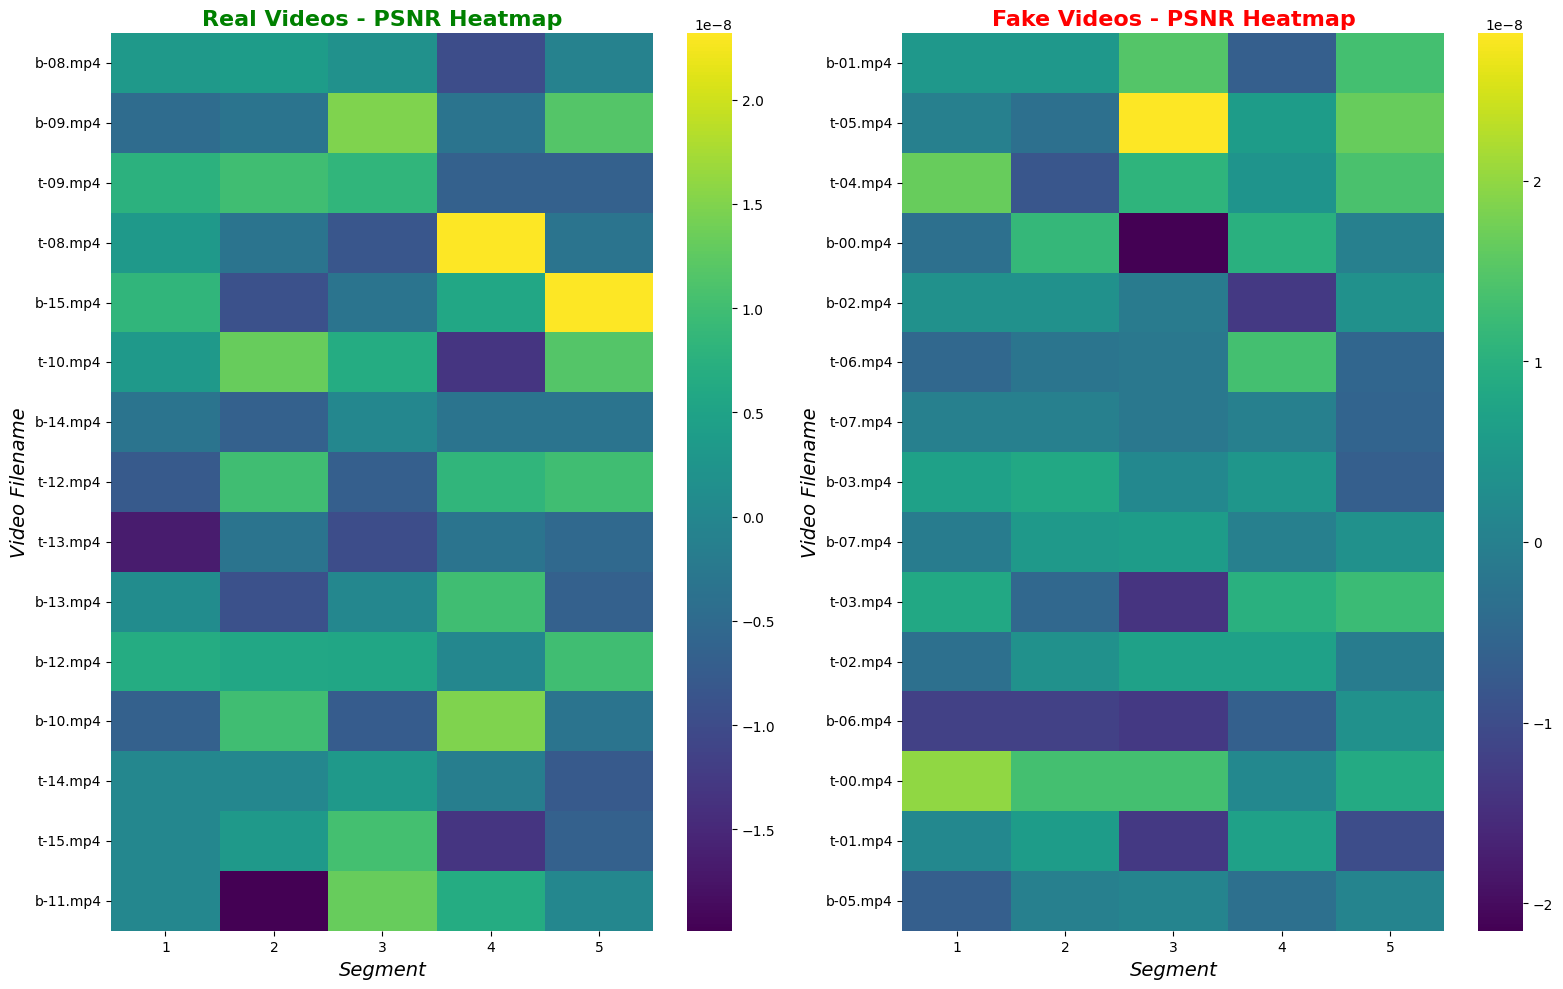

In [21]:
feature = 'psnr'
feature_display_name = feature.upper()

# Check number of frames
num_frames = len(df_pdd[feature][0])

if num_frames > 5:
    df_pdd[f'{feature}_segmented'] = df_pdd[feature].apply(lambda x: average_segments(x, 5))
    frame_labels = [f"{i+1}" for i in range(5)]
else:
    df_pdd[f'{feature}_segmented'] = df_pdd[feature]
    frame_labels = [f"{i+1}" for i in range(num_frames)]

# Split and stack
real_df_pdd = df_pdd[df_pdd['fake'] == 0].copy()
fake_df_pdd = df_pdd[df_pdd['fake'] == 1].copy()

real_data = np.stack(real_df_pdd[f'{feature}_segmented'].to_numpy())
fake_data = np.stack(fake_df_pdd[f'{feature}_segmented'].to_numpy())

# Plot
fig, axs = plt.subplots(1, 2, figsize=(16, 10))

sns.heatmap(real_data, ax=axs[0], cmap="viridis", cbar=True,
            xticklabels=frame_labels, yticklabels=real_df_pdd['filename'].tolist())
axs[0].set_title(f"Real Videos - {feature_display_name} Heatmap", fontsize=16, fontweight='bold', color="green")
axs[0].set_xlabel("Segment", fontsize=14, fontstyle='italic')
axs[0].set_ylabel("Video Filename", fontsize=14, fontstyle='italic')

sns.heatmap(fake_data, ax=axs[1], cmap="viridis", cbar=True,
            xticklabels=frame_labels, yticklabels=fake_df_pdd['filename'].tolist())
axs[1].set_title(f"Fake Videos - {feature_display_name} Heatmap", fontsize=16, fontweight='bold', color="red")
axs[1].set_xlabel("Segment", fontsize=14, fontstyle='italic')
axs[1].set_ylabel("Video Filename", fontsize=14, fontstyle='italic')

plt.tight_layout()

## Pulse

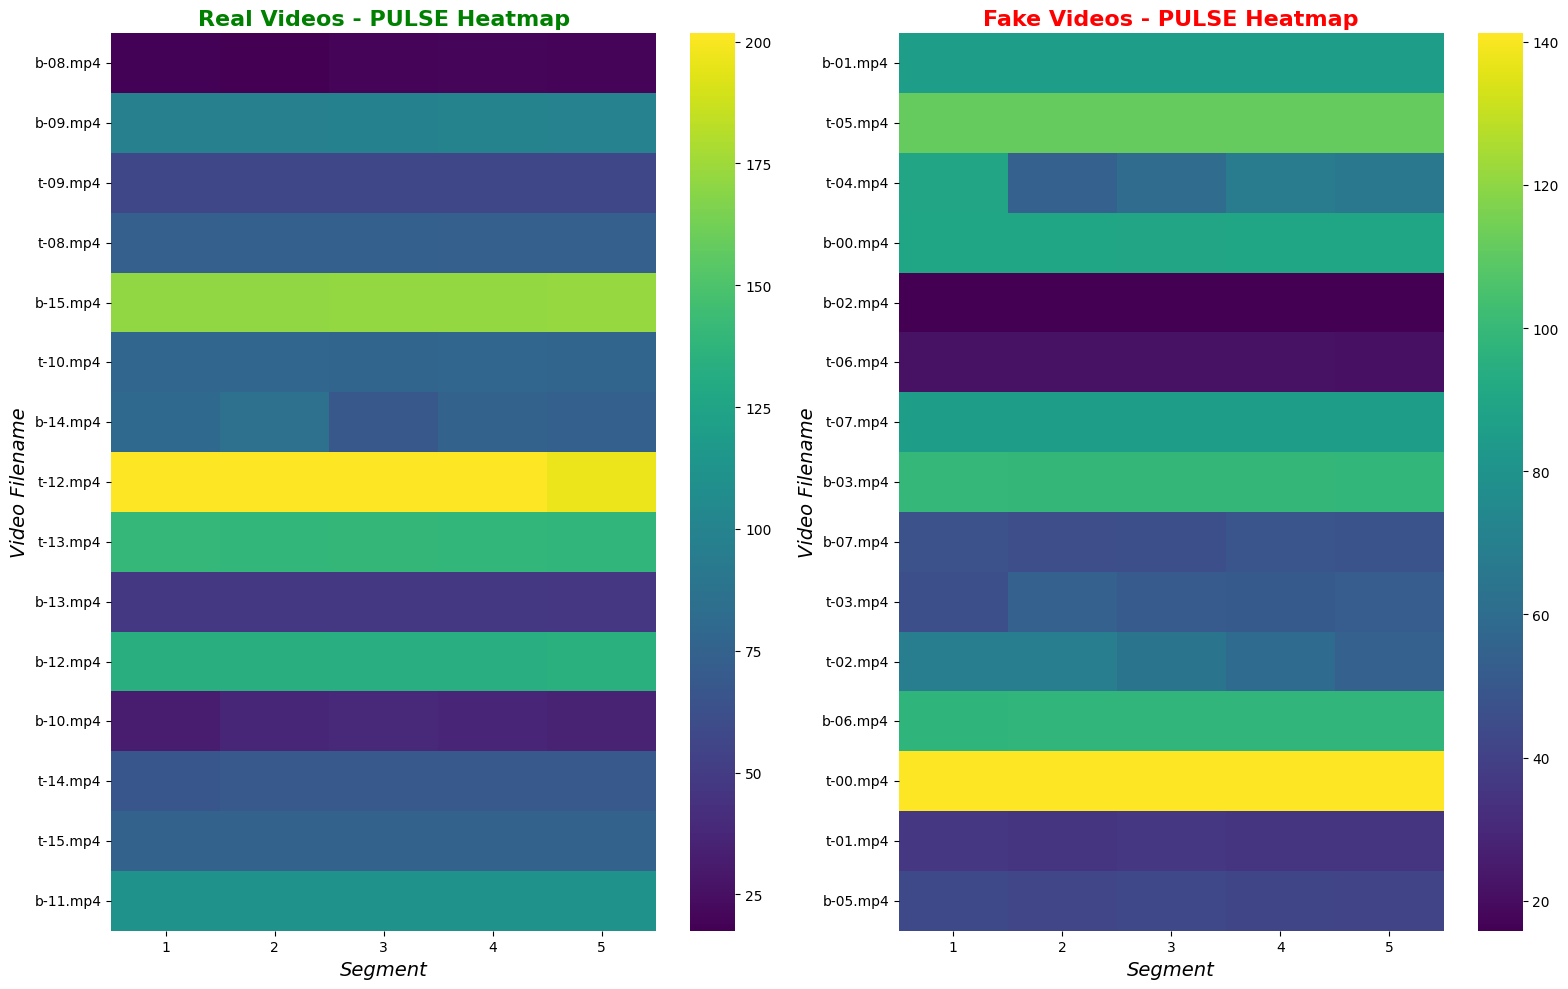

In [20]:
feature = 'pulse'
feature_display_name = feature.upper()

# Check number of frames
num_frames = len(df_pdd[feature][0])

if num_frames > 5:
    df_pdd[f'{feature}_segmented'] = df_pdd[feature].apply(lambda x: average_segments(x, 5))
    frame_labels = [f"{i+1}" for i in range(5)]
else:
    df_pdd[f'{feature}_segmented'] = df_pdd[feature]
    frame_labels = [f"{i+1}" for i in range(num_frames)]

# Split and stack
real_df_pdd = df_pdd[df_pdd['fake'] == 0].copy()
fake_df_pdd = df_pdd[df_pdd['fake'] == 1].copy()

real_data = np.stack(real_df_pdd[f'{feature}_segmented'].to_numpy())
fake_data = np.stack(fake_df_pdd[f'{feature}_segmented'].to_numpy())

# Plot
fig, axs = plt.subplots(1, 2, figsize=(16, 10))

sns.heatmap(real_data, ax=axs[0], cmap="viridis", cbar=True,
            xticklabels=frame_labels, yticklabels=real_df_pdd['filename'].tolist())
axs[0].set_title(f"Real Videos - {feature_display_name} Heatmap", fontsize=16, fontweight='bold', color="green")
axs[0].set_xlabel("Segment", fontsize=14, fontstyle='italic')
axs[0].set_ylabel("Video Filename", fontsize=14, fontstyle='italic')

sns.heatmap(fake_data, ax=axs[1], cmap="viridis", cbar=True,
            xticklabels=frame_labels, yticklabels=fake_df_pdd['filename'].tolist())
axs[1].set_title(f"Fake Videos - {feature_display_name} Heatmap", fontsize=16, fontweight='bold', color="red")
axs[1].set_xlabel("Segment", fontsize=14, fontstyle='italic')
axs[1].set_ylabel("Video Filename", fontsize=14, fontstyle='italic')

plt.tight_layout()
plt.show()

# Evaluation Dataset

## Head Movement

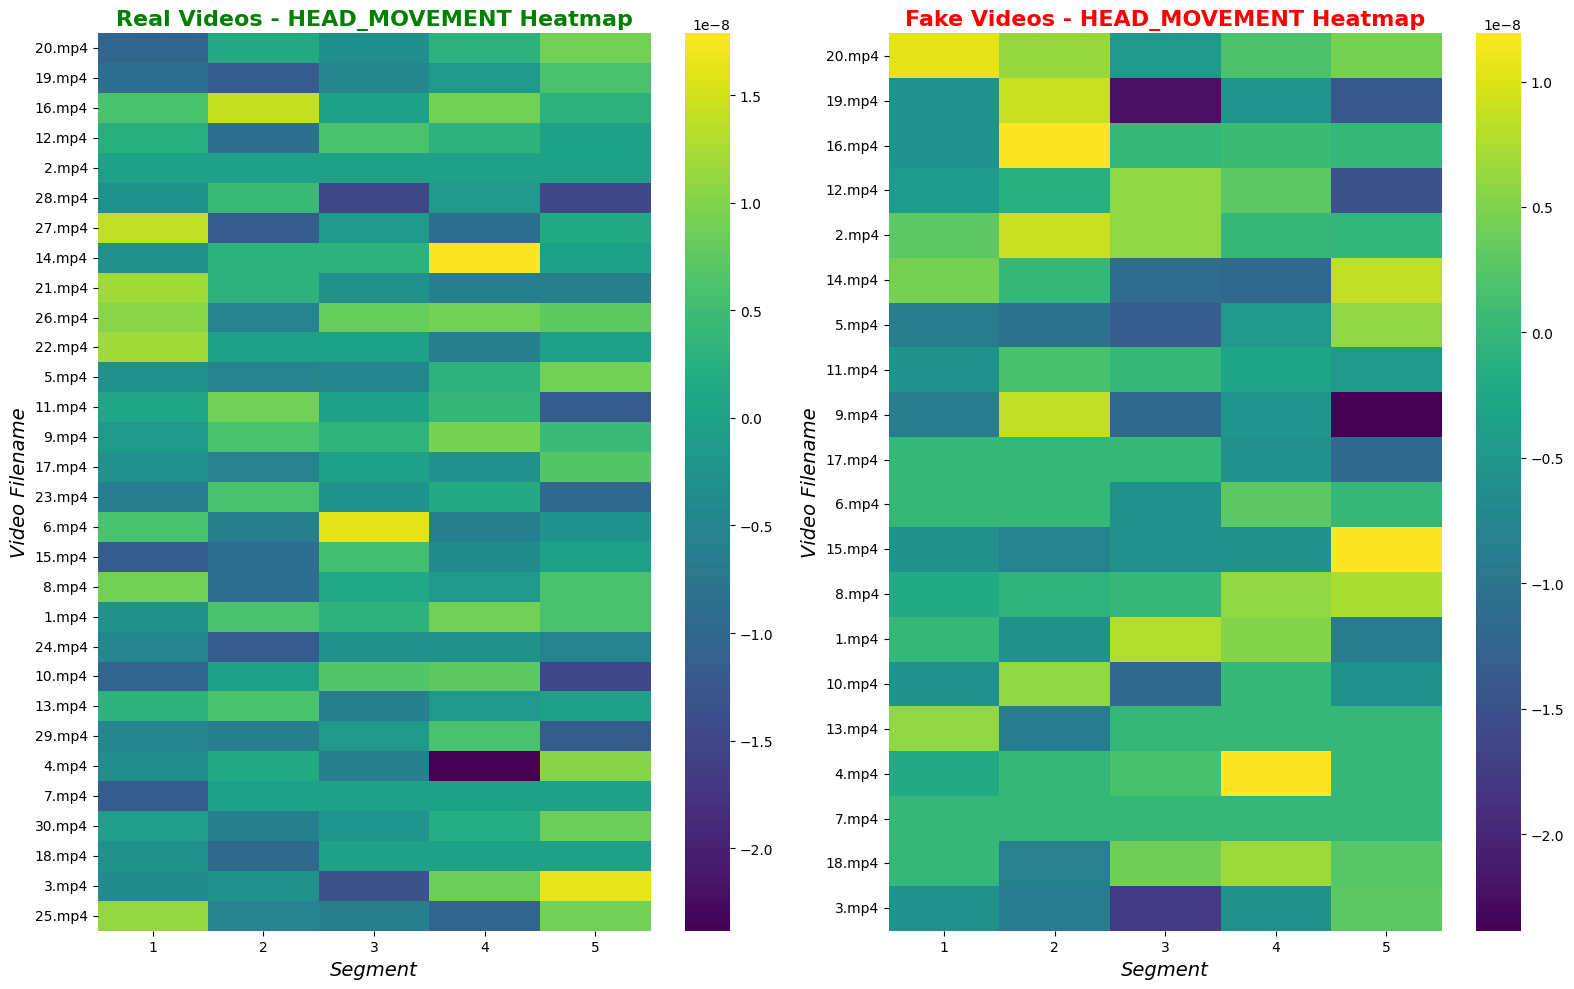

In [11]:
feature = 'head_movement'
feature_display_name = feature.upper()

# Check number of frames
num_frames = len(df_eval[feature][0])

if num_frames > 5:
    df_eval[f'{feature}_segmented'] = df_eval[feature].apply(lambda x: average_segments(x, 5))
    frame_labels = [f"{i+1}" for i in range(5)]
else:
    df_eval[f'{feature}_segmented'] = df_eval[feature]
    frame_labels = [f"{i+1}" for i in range(num_frames)]

# Split and stack
real_df_eval = df_eval[df_eval['fake'] == 0].copy()
fake_df_eval = df_eval[df_eval['fake'] == 1].copy()

real_data = np.stack(real_df_eval[f'{feature}_segmented'].to_numpy())
fake_data = np.stack(fake_df_eval[f'{feature}_segmented'].to_numpy())

# Plot
fig, axs = plt.subplots(1, 2, figsize=(16, 10))

sns.heatmap(real_data, ax=axs[0], cmap="viridis", cbar=True,
            xticklabels=frame_labels, yticklabels=real_df_eval['filename'].tolist())
axs[0].set_title(f"Real Videos - {feature_display_name} Heatmap", fontsize=16, fontweight='bold', color="green")
axs[0].set_xlabel("Segment", fontsize=14, fontstyle='italic')
axs[0].set_ylabel("Video Filename", fontsize=14, fontstyle='italic')

sns.heatmap(fake_data, ax=axs[1], cmap="viridis", cbar=True,
            xticklabels=frame_labels, yticklabels=fake_df_eval['filename'].tolist())
axs[1].set_title(f"Fake Videos - {feature_display_name} Heatmap", fontsize=16, fontweight='bold', color="red")
axs[1].set_xlabel("Segment", fontsize=14, fontstyle='italic')
axs[1].set_ylabel("Video Filename", fontsize=14, fontstyle='italic')

plt.tight_layout()
plt.show()

## Flicker

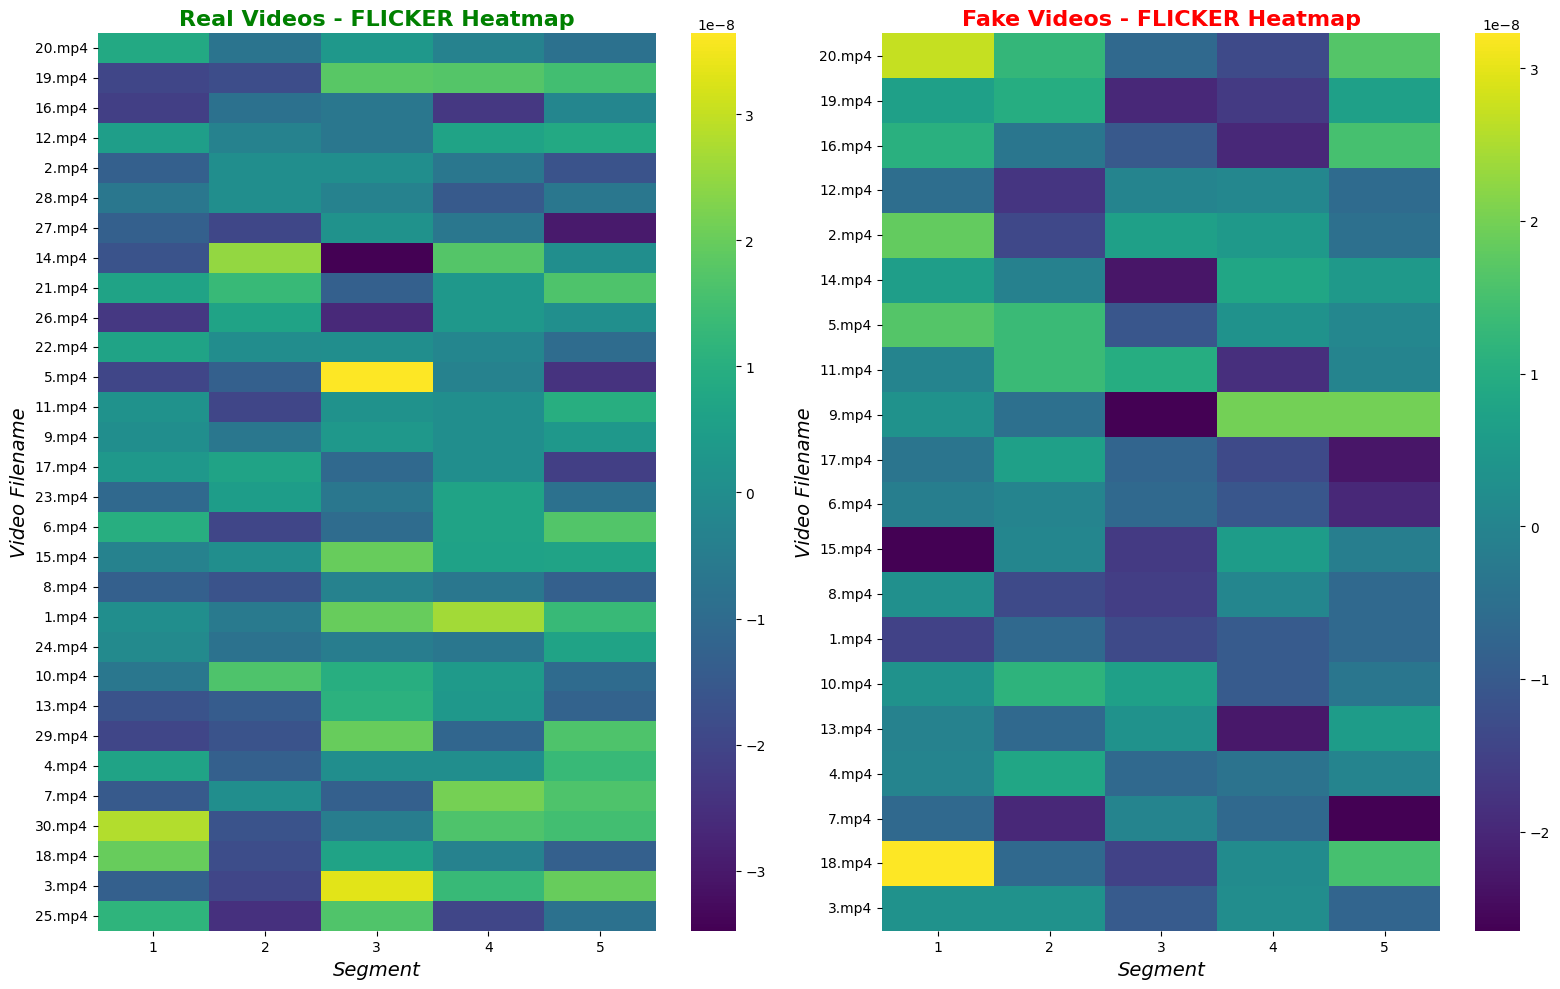

In [12]:
feature = 'flicker'
feature_display_name = feature.upper()

# Check number of frames
num_frames = len(df_eval[feature][0])

if num_frames > 5:
    df_eval[f'{feature}_segmented'] = df_eval[feature].apply(lambda x: average_segments(x, 5))
    frame_labels = [f"{i+1}" for i in range(5)]
else:
    df_eval[f'{feature}_segmented'] = df_eval[feature]
    frame_labels = [f"{i+1}" for i in range(num_frames)]

# Split and stack
real_df_eval = df_eval[df_eval['fake'] == 0].copy()
fake_df_eval = df_eval[df_eval['fake'] == 1].copy()

real_data = np.stack(real_df_eval[f'{feature}_segmented'].to_numpy())
fake_data = np.stack(fake_df_eval[f'{feature}_segmented'].to_numpy())

# Plot
fig, axs = plt.subplots(1, 2, figsize=(16, 10))

sns.heatmap(real_data, ax=axs[0], cmap="viridis", cbar=True,
            xticklabels=frame_labels, yticklabels=real_df_eval['filename'].tolist())
axs[0].set_title(f"Real Videos - {feature_display_name} Heatmap", fontsize=16, fontweight='bold', color="green")
axs[0].set_xlabel("Segment", fontsize=14, fontstyle='italic')
axs[0].set_ylabel("Video Filename", fontsize=14, fontstyle='italic')

sns.heatmap(fake_data, ax=axs[1], cmap="viridis", cbar=True,
            xticklabels=frame_labels, yticklabels=fake_df_eval['filename'].tolist())
axs[1].set_title(f"Fake Videos - {feature_display_name} Heatmap", fontsize=16, fontweight='bold', color="red")
axs[1].set_xlabel("Segment", fontsize=14, fontstyle='italic')
axs[1].set_ylabel("Video Filename", fontsize=14, fontstyle='italic')

plt.tight_layout()
plt.show()

## Blink

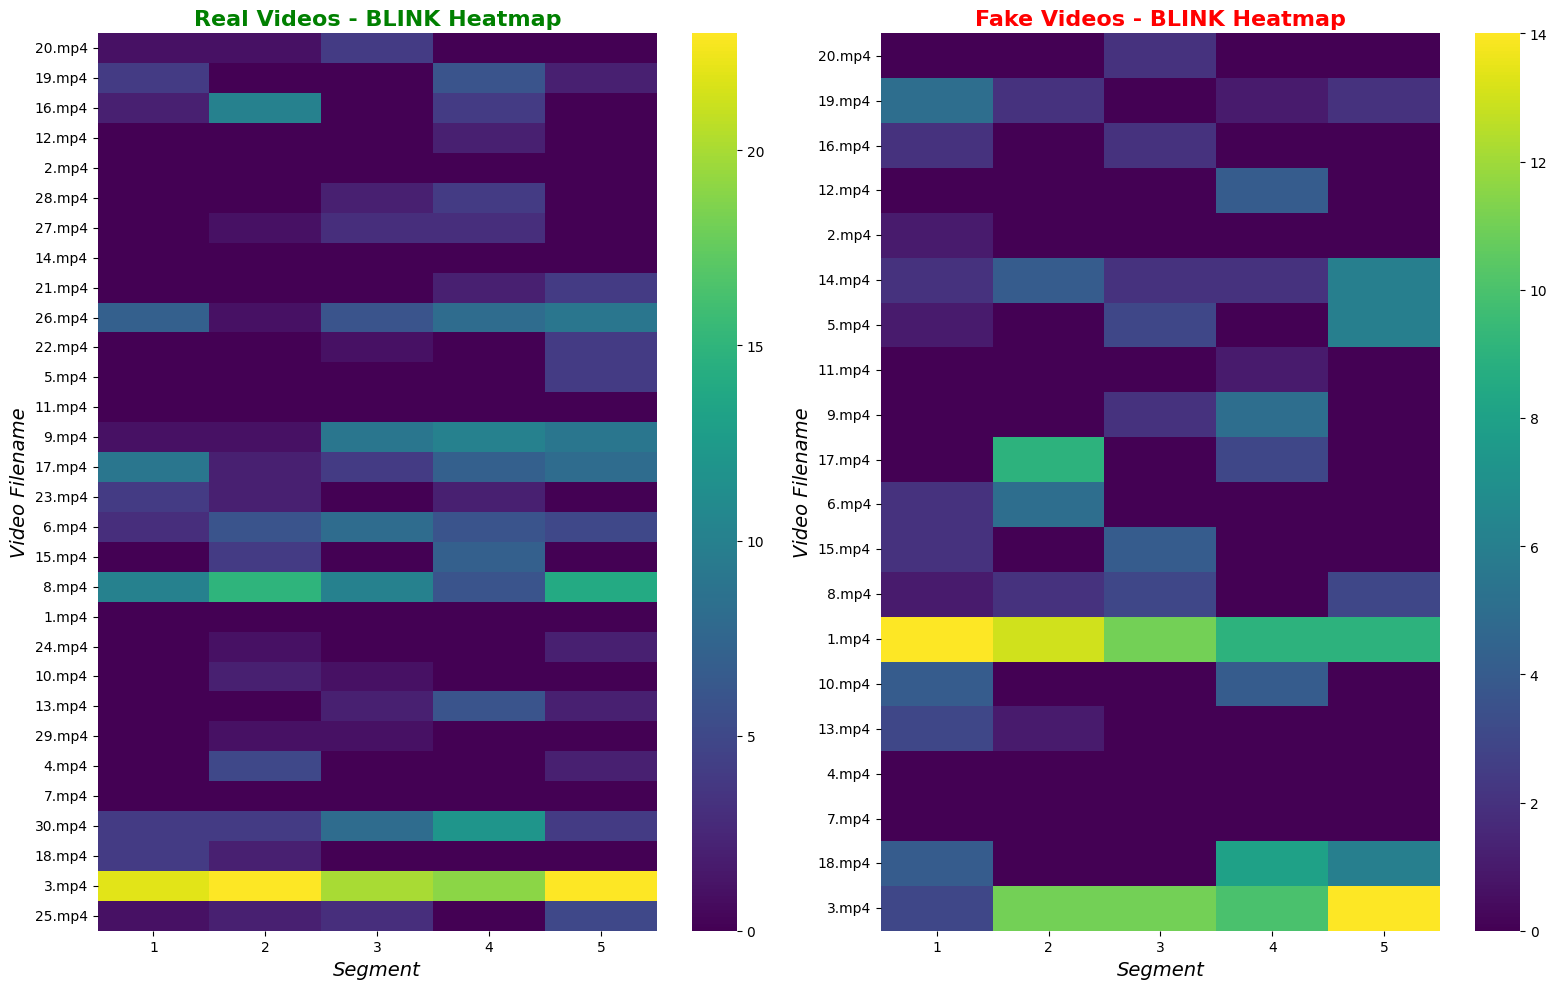

In [13]:
feature = 'blink'
feature_display_name = feature.upper()

# Check number of frames
num_frames = len(df_eval[feature][0])

if num_frames > 5:
    df_eval[f'{feature}_segmented'] = df_eval[feature].apply(lambda x: average_segments(x, 5))
    frame_labels = [f"{i+1}" for i in range(5)]
else:
    df_eval[f'{feature}_segmented'] = df_eval[feature]
    frame_labels = [f"{i+1}" for i in range(num_frames)]

# Split and stack
real_df_eval = df_eval[df_eval['fake'] == 0].copy()
fake_df_eval = df_eval[df_eval['fake'] == 1].copy()

real_data = np.stack(real_df_eval[f'{feature}_segmented'].to_numpy())
fake_data = np.stack(fake_df_eval[f'{feature}_segmented'].to_numpy())

# Plot
fig, axs = plt.subplots(1, 2, figsize=(16, 10))

sns.heatmap(real_data, ax=axs[0], cmap="viridis", cbar=True,
            xticklabels=frame_labels, yticklabels=real_df_eval['filename'].tolist())
axs[0].set_title(f"Real Videos - {feature_display_name} Heatmap", fontsize=16, fontweight='bold', color="green")
axs[0].set_xlabel("Segment", fontsize=14, fontstyle='italic')
axs[0].set_ylabel("Video Filename", fontsize=14, fontstyle='italic')

sns.heatmap(fake_data, ax=axs[1], cmap="viridis", cbar=True,
            xticklabels=frame_labels, yticklabels=fake_df_eval['filename'].tolist())
axs[1].set_title(f"Fake Videos - {feature_display_name} Heatmap", fontsize=16, fontweight='bold', color="red")
axs[1].set_xlabel("Segment", fontsize=14, fontstyle='italic')
axs[1].set_ylabel("Video Filename", fontsize=14, fontstyle='italic')

plt.tight_layout()
plt.show()

## Lip movement variance

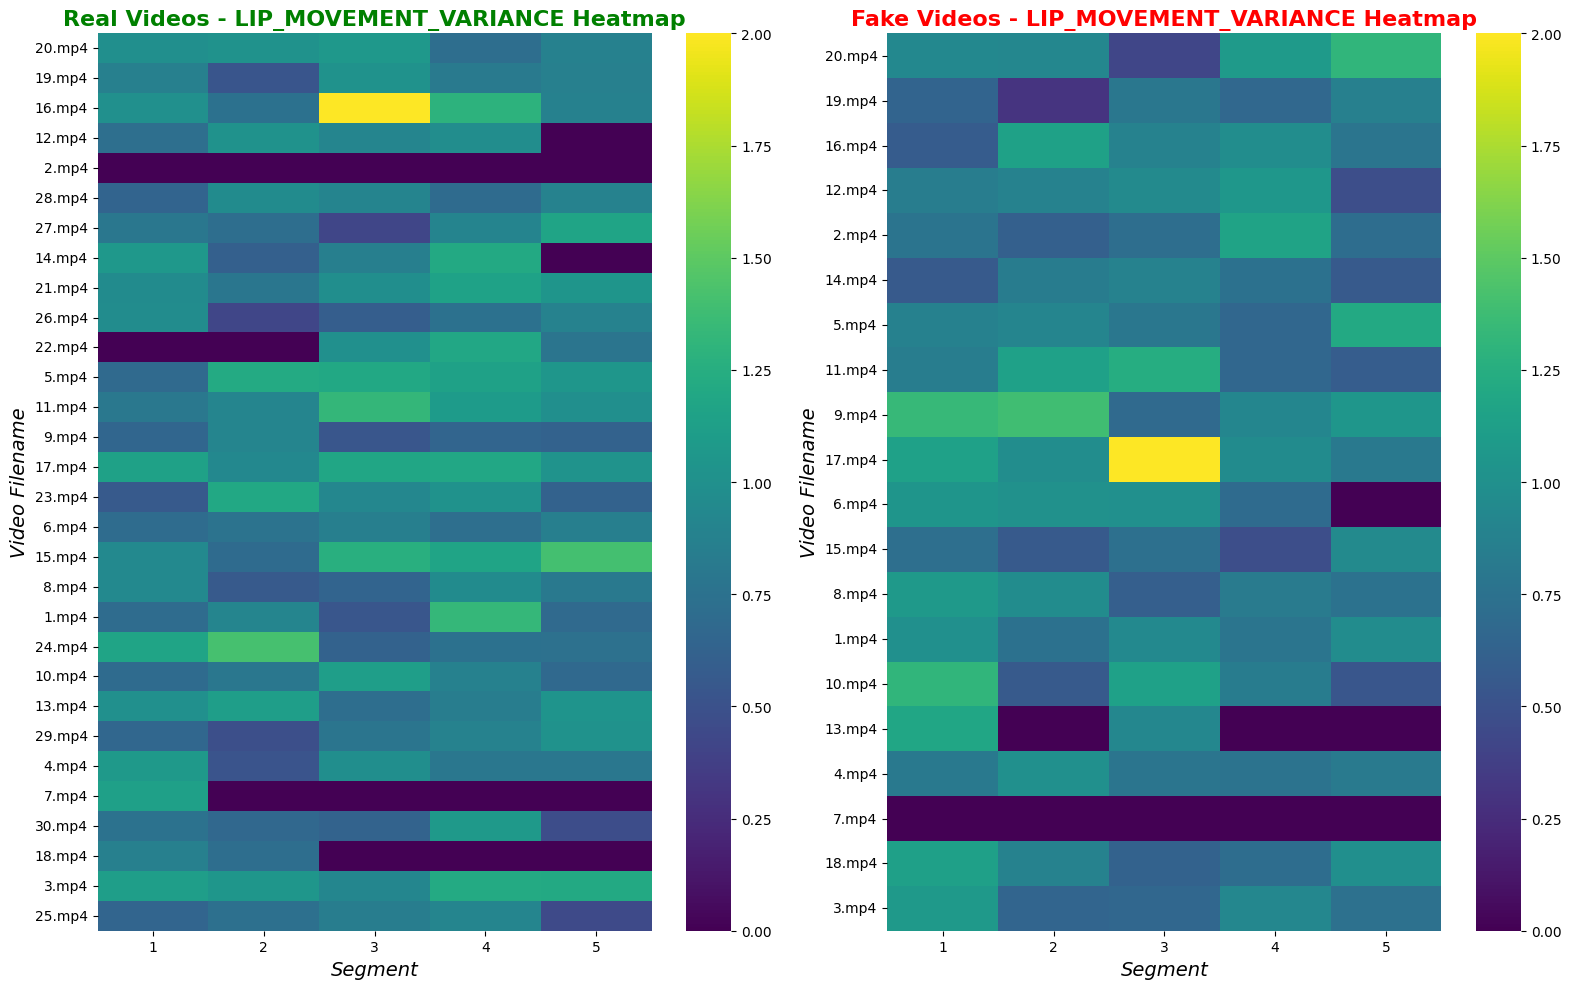

In [14]:
feature = 'lip_movement_variance'
feature_display_name = feature.upper()

# Check number of frames
num_frames = len(df_eval[feature][0])

if num_frames > 5:
    df_eval[f'{feature}_segmented'] = df_eval[feature].apply(lambda x: average_segments(x, 5))
    frame_labels = [f"{i+1}" for i in range(5)]
else:
    df_eval[f'{feature}_segmented'] = df_eval[feature]
    frame_labels = [f"{i+1}" for i in range(num_frames)]

# Split and stack
real_df_eval = df_eval[df_eval['fake'] == 0].copy()
fake_df_eval = df_eval[df_eval['fake'] == 1].copy()

real_data = np.stack(real_df_eval[f'{feature}_segmented'].to_numpy())
fake_data = np.stack(fake_df_eval[f'{feature}_segmented'].to_numpy())

# Plot
fig, axs = plt.subplots(1, 2, figsize=(16, 10))

sns.heatmap(real_data, ax=axs[0], cmap="viridis", cbar=True,
            xticklabels=frame_labels, yticklabels=real_df_eval['filename'].tolist())
axs[0].set_title(f"Real Videos - {feature_display_name} Heatmap", fontsize=16, fontweight='bold', color="green")
axs[0].set_xlabel("Segment", fontsize=14, fontstyle='italic')
axs[0].set_ylabel("Video Filename", fontsize=14, fontstyle='italic')

sns.heatmap(fake_data, ax=axs[1], cmap="viridis", cbar=True,
            xticklabels=frame_labels, yticklabels=fake_df_eval['filename'].tolist())
axs[1].set_title(f"Fake Videos - {feature_display_name} Heatmap", fontsize=16, fontweight='bold', color="red")
axs[1].set_xlabel("Segment", fontsize=14, fontstyle='italic')
axs[1].set_ylabel("Video Filename", fontsize=14, fontstyle='italic')

plt.tight_layout()
plt.show()

## SSIM

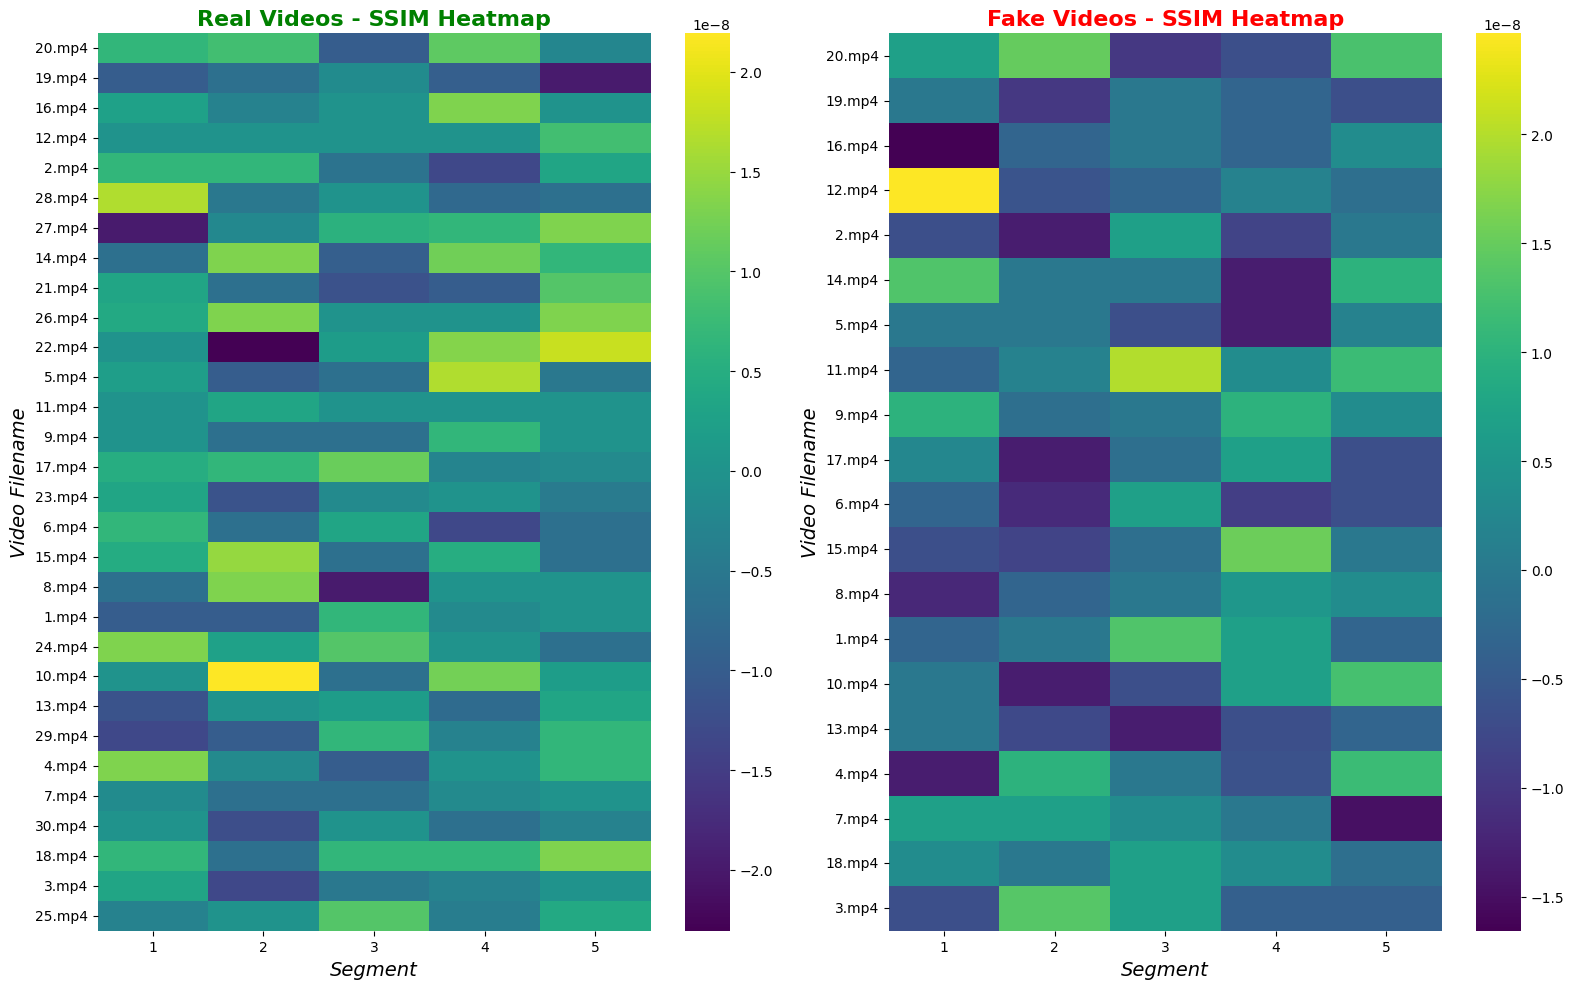

In [15]:
feature = 'ssim'
feature_display_name = feature.upper()

# Check number of frames
num_frames = len(df_eval[feature][0])

if num_frames > 5:
    df_eval[f'{feature}_segmented'] = df_eval[feature].apply(lambda x: average_segments(x, 5))
    frame_labels = [f"{i+1}" for i in range(5)]
else:
    df_eval[f'{feature}_segmented'] = df_eval[feature]
    frame_labels = [f"{i+1}" for i in range(num_frames)]

# Split and stack
real_df_eval = df_eval[df_eval['fake'] == 0].copy()
fake_df_eval = df_eval[df_eval['fake'] == 1].copy()

real_data = np.stack(real_df_eval[f'{feature}_segmented'].to_numpy())
fake_data = np.stack(fake_df_eval[f'{feature}_segmented'].to_numpy())

# Plot
fig, axs = plt.subplots(1, 2, figsize=(16, 10))

sns.heatmap(real_data, ax=axs[0], cmap="viridis", cbar=True,
            xticklabels=frame_labels, yticklabels=real_df_eval['filename'].tolist())
axs[0].set_title(f"Real Videos - {feature_display_name} Heatmap", fontsize=16, fontweight='bold', color="green")
axs[0].set_xlabel("Segment", fontsize=14, fontstyle='italic')
axs[0].set_ylabel("Video Filename", fontsize=14, fontstyle='italic')

sns.heatmap(fake_data, ax=axs[1], cmap="viridis", cbar=True,
            xticklabels=frame_labels, yticklabels=fake_df_eval['filename'].tolist())
axs[1].set_title(f"Fake Videos - {feature_display_name} Heatmap", fontsize=16, fontweight='bold', color="red")
axs[1].set_xlabel("Segment", fontsize=14, fontstyle='italic')
axs[1].set_ylabel("Video Filename", fontsize=14, fontstyle='italic')

plt.tight_layout()
plt.show()

## PSNR

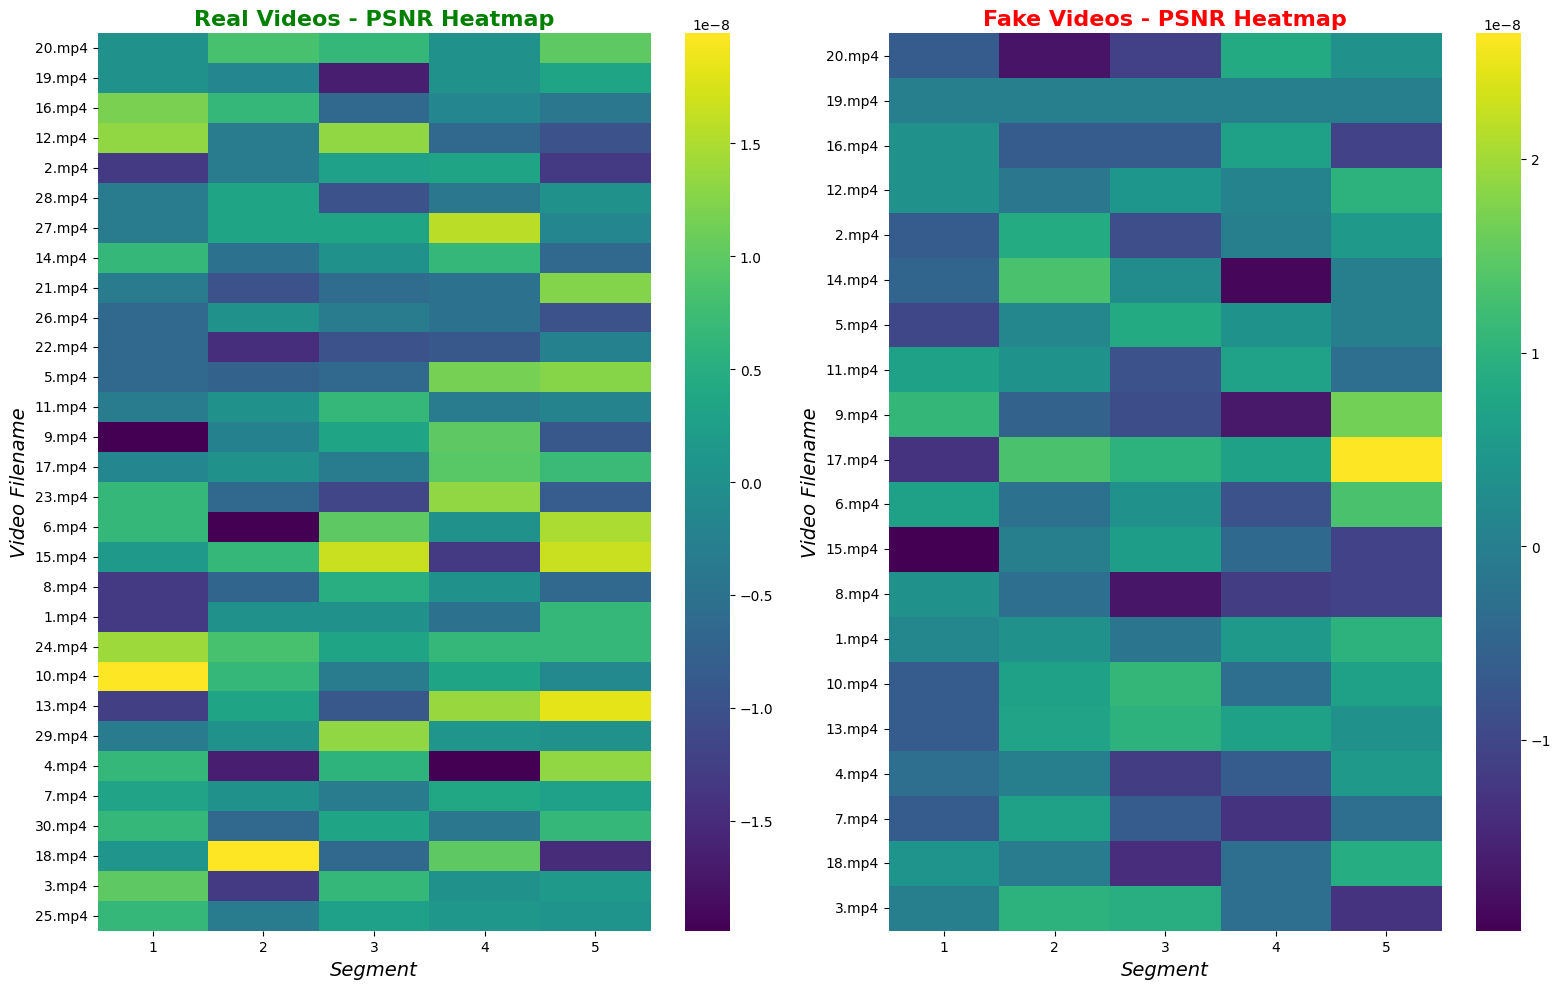

In [16]:
feature = 'psnr'
feature_display_name = feature.upper()

# Check number of frames
num_frames = len(df_eval[feature][0])

if num_frames > 5:
    df_eval[f'{feature}_segmented'] = df_eval[feature].apply(lambda x: average_segments(x, 5))
    frame_labels = [f"{i+1}" for i in range(5)]
else:
    df_eval[f'{feature}_segmented'] = df_eval[feature]
    frame_labels = [f"{i+1}" for i in range(num_frames)]

# Split and stack
real_df_eval = df_eval[df_eval['fake'] == 0].copy()
fake_df_eval = df_eval[df_eval['fake'] == 1].copy()

real_data = np.stack(real_df_eval[f'{feature}_segmented'].to_numpy())
fake_data = np.stack(fake_df_eval[f'{feature}_segmented'].to_numpy())

# Plot
fig, axs = plt.subplots(1, 2, figsize=(16, 10))

sns.heatmap(real_data, ax=axs[0], cmap="viridis", cbar=True,
            xticklabels=frame_labels, yticklabels=real_df_eval['filename'].tolist())
axs[0].set_title(f"Real Videos - {feature_display_name} Heatmap", fontsize=16, fontweight='bold', color="green")
axs[0].set_xlabel("Segment", fontsize=14, fontstyle='italic')
axs[0].set_ylabel("Video Filename", fontsize=14, fontstyle='italic')

sns.heatmap(fake_data, ax=axs[1], cmap="viridis", cbar=True,
            xticklabels=frame_labels, yticklabels=fake_df_eval['filename'].tolist())
axs[1].set_title(f"Fake Videos - {feature_display_name} Heatmap", fontsize=16, fontweight='bold', color="red")
axs[1].set_xlabel("Segment", fontsize=14, fontstyle='italic')
axs[1].set_ylabel("Video Filename", fontsize=14, fontstyle='italic')

plt.tight_layout()
plt.show()

## Pulse

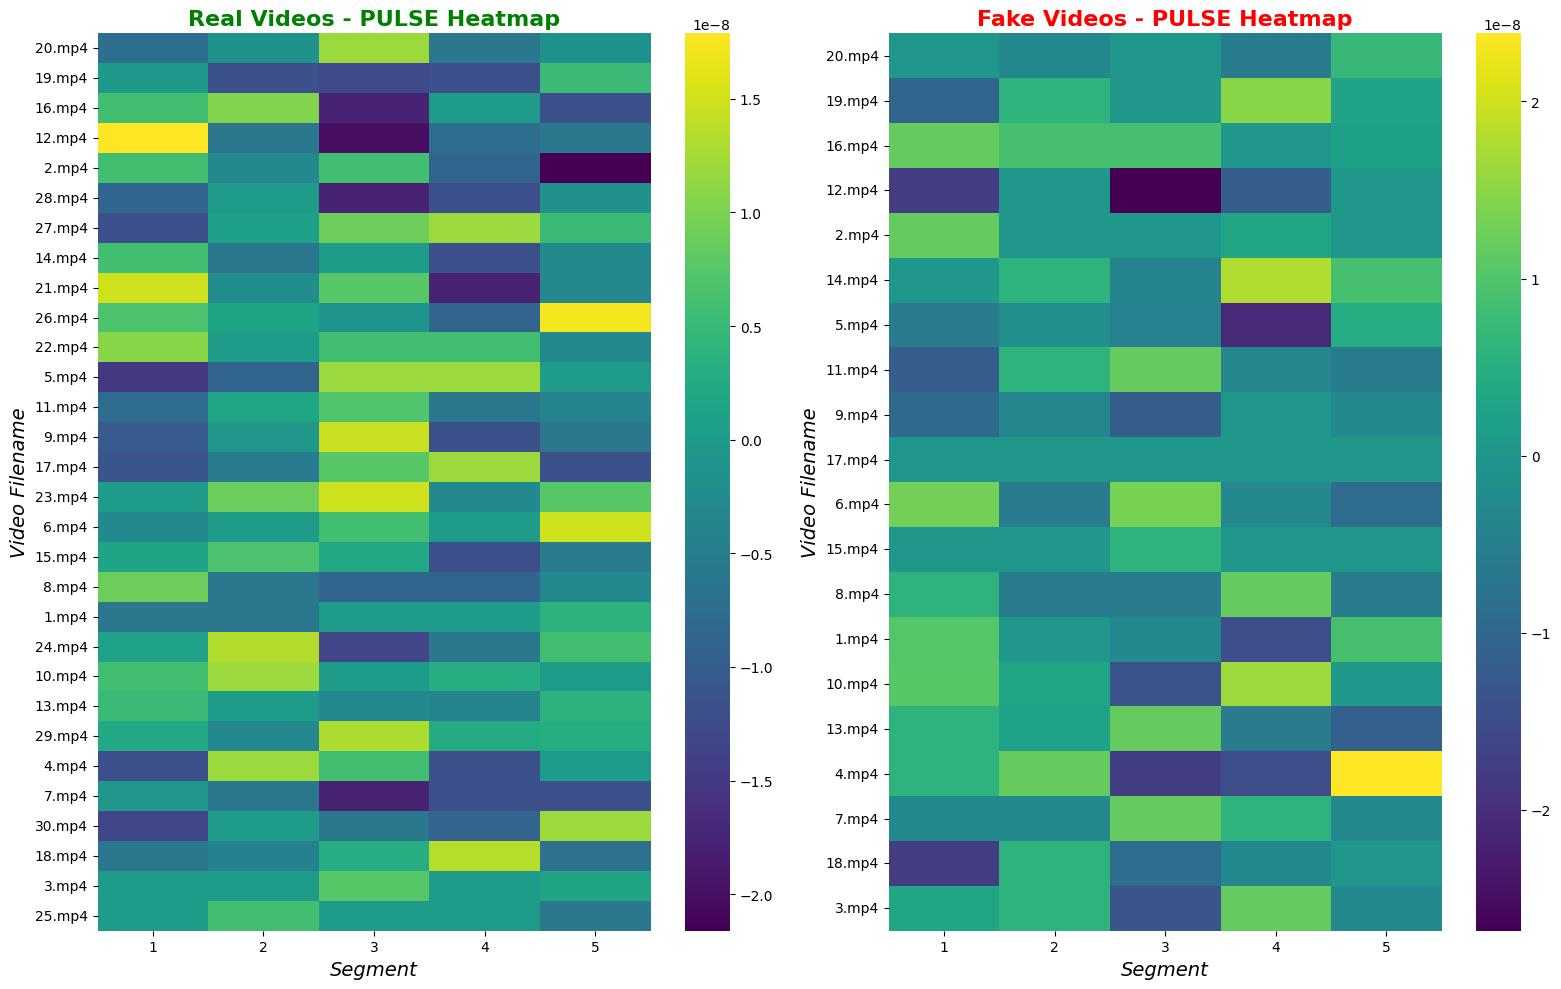

In [17]:
feature = 'pulse'
feature_display_name = feature.upper()

# Check number of frames
num_frames = len(df_eval[feature][0])

if num_frames > 5:
    df_eval[f'{feature}_segmented'] = df_eval[feature].apply(lambda x: average_segments(x, 5))
    frame_labels = [f"{i+1}" for i in range(5)]
else:
    df_eval[f'{feature}_segmented'] = df_eval[feature]
    frame_labels = [f"{i+1}" for i in range(num_frames)]

# Split and stack
real_df_eval = df_eval[df_eval['fake'] == 0].copy()
fake_df_eval = df_eval[df_eval['fake'] == 1].copy()

real_data = np.stack(real_df_eval[f'{feature}_segmented'].to_numpy())
fake_data = np.stack(fake_df_eval[f'{feature}_segmented'].to_numpy())

# Plot
fig, axs = plt.subplots(1, 2, figsize=(16, 10))

sns.heatmap(real_data, ax=axs[0], cmap="viridis", cbar=True,
            xticklabels=frame_labels, yticklabels=real_df_eval['filename'].tolist())
axs[0].set_title(f"Real Videos - {feature_display_name} Heatmap", fontsize=16, fontweight='bold', color="green")
axs[0].set_xlabel("Segment", fontsize=14, fontstyle='italic')
axs[0].set_ylabel("Video Filename", fontsize=14, fontstyle='italic')

sns.heatmap(fake_data, ax=axs[1], cmap="viridis", cbar=True,
            xticklabels=frame_labels, yticklabels=fake_df_eval['filename'].tolist())
axs[1].set_title(f"Fake Videos - {feature_display_name} Heatmap", fontsize=16, fontweight='bold', color="red")
axs[1].set_xlabel("Segment", fontsize=14, fontstyle='italic')
axs[1].set_ylabel("Video Filename", fontsize=14, fontstyle='italic')

plt.tight_layout()
plt.show()